In [1]:
from behavior_utils import *
import matplotlib.pyplot as plt

### Initialize paths


In [5]:
root_path = 'S:'
experiment = 'clickbait-motivate'
events_dir = 'bonsai'

# Get paths to relevant files
ttl_paths = get_file_paths(f"{root_path}/{experiment}/preprocessed", 'npy', 'ttl', session_type="m", print_paths=True, print_n=np.inf)
video_paths = get_file_paths(f"{root_path}/{experiment}/{events_dir}", 'avi', '', session_type="m", print_paths=False, print_n=3)
timestamps = get_file_paths(f"{root_path}/{experiment}/{events_dir}", 'csv', 'timestamp', session_type="m", print_paths=False, print_n=3)
event_paths_a = get_file_paths(f"{root_path}/{experiment}/{events_dir}", 'csv', '_eventsA', session_type="m", print_paths=False, print_n=3)
event_paths_b = get_file_paths(f"{root_path}/{experiment}/{events_dir}", 'csv', '_eventsB', session_type="m", print_paths=False, print_n=3)

# Root directory for saving processed data
save_path = Path(f"{root_path}/{experiment}/{events_dir}")

Found 20 ttl.npy files
0 S:\clickbait-motivate\preprocessed\7001\m1\ttls.npy
1 S:\clickbait-motivate\preprocessed\7001\m2\ttls.npy
2 S:\clickbait-motivate\preprocessed\7001\m3\ttls.npy
3 S:\clickbait-motivate\preprocessed\7001\m4\ttls.npy
4 S:\clickbait-motivate\preprocessed\7001\m5\ttls.npy
5 S:\clickbait-motivate\preprocessed\7001\m6\ttls.npy
6 S:\clickbait-motivate\preprocessed\7003\m0\ttls.npy
7 S:\clickbait-motivate\preprocessed\7003\m1\ttls.npy
8 S:\clickbait-motivate\preprocessed\7003\m2\ttls.npy
9 S:\clickbait-motivate\preprocessed\7003\m3\ttls.npy
10 S:\clickbait-motivate\preprocessed\7003\m4\ttls.npy
11 S:\clickbait-motivate\preprocessed\7003\m5\ttls.npy
12 S:\clickbait-motivate\preprocessed\7003\m6\ttls.npy
13 S:\clickbait-motivate\preprocessed\7004\m0\ttls.npy
14 S:\clickbait-motivate\preprocessed\7004\m1\ttls.npy
15 S:\clickbait-motivate\preprocessed\7004\m2\ttls.npy
16 S:\clickbait-motivate\preprocessed\7004\m3\ttls.npy
17 S:\clickbait-motivate\preprocessed\7004\m4\ttls.n

In [8]:
# Make sure only paths with valid TTL files are used
video_paths = filter_paths(video_paths, ttl_paths)
timestamps = filter_paths(timestamps, ttl_paths)
event_paths_a = filter_paths(event_paths_a, ttl_paths)
event_paths_b = filter_paths(event_paths_b, ttl_paths)

print(f"Using {len(video_paths)} .avi files.")
print(f"Using {len(timestamps)} timestamp.csv files.")
print(f"Using {len(event_paths_a)} _eventsA.csv files")
print(f"Using {len(event_paths_b)} _eventsB.csv files")

Using 20 .avi files.
Using 20 timestamp.csv files.
Using 20 _eventsA.csv files
Using 20 _eventsB.csv files


### Dict of 'names': 'types' for event dataframe columns

In [9]:
columns = {'trial_number': 'uint8',
            'timestamp': 'datetime64[ns]',
            'poke_left': 'bool',
            'poke_right': 'bool',
            'centroid_x': 'uint16',
            'centroid_y': 'uint16',
            'target_cell': 'str',
            'iti': 'bool',
            'water_left': 'bool',
            'water_right': 'bool',
            'reward_state': 'bool',
            'click': 'bool',
            'flip_state': 'bool'
            }

### Process events and assign TTL times to each observation

In [10]:
for session_idx in range(len(video_paths)):
    #try:
    # Binarize ttl signal and crop to capture portion
    ttl_full = process_ttl(ttl_paths[session_idx], ttl_floor=10000, min_frame_duration=6, min_frame_spacing=6)
    ttl_crop, ttl_times = crop_ttl(ttl_full)

    event_data = process_events(session_idx, event_paths_a, event_paths_b, columns)
    # Create a column of millisecond timestamps, derived from Bonsai timestamps and offset by the first ttl pulse time
    ttl_offset = len(ttl_times) - len(event_data)
    timestamp_ms =  ttl_times[ttl_offset:]
    event_data['timestamp_ms'] = timestamp_ms.astype(np.int32)

    # Set up save path
    mouse_id = ttl_paths[session_idx].parents[1].name
    session_id = ttl_paths[session_idx].parents[0].name
    event_path = save_path / mouse_id / session_id

    # if event path doesn't exist, create it
    if not event_path.exists():
        event_path.mkdir(parents=True, exist_ok=True)
    
    # Save event data
    event_data.to_csv(save_path / mouse_id / session_id / f'events.csv', index=False)
    print(f"Saved events for {mouse_id} {session_id} to {save_path / mouse_id / session_id / f'events.csv'}")
    #except:
     #   print(f"Error processing events for {video_paths[session_idx]}")
     #   continue

Saved events for 7001 m1 to S:\clickbait-motivate\bonsai\7001\m1\events.csv
Saved events for 7001 m2 to S:\clickbait-motivate\bonsai\7001\m2\events.csv
Saved events for 7001 m3 to S:\clickbait-motivate\bonsai\7001\m3\events.csv
Saved events for 7001 m4 to S:\clickbait-motivate\bonsai\7001\m4\events.csv
Saved events for 7001 m5 to S:\clickbait-motivate\bonsai\7001\m5\events.csv
Saved events for 7001 m6 to S:\clickbait-motivate\bonsai\7001\m6\events.csv
Saved events for 7003 m0 to S:\clickbait-motivate\bonsai\7003\m0\events.csv
Saved events for 7003 m1 to S:\clickbait-motivate\bonsai\7003\m1\events.csv
Saved events for 7003 m2 to S:\clickbait-motivate\bonsai\7003\m2\events.csv
Saved events for 7003 m3 to S:\clickbait-motivate\bonsai\7003\m3\events.csv
Saved events for 7003 m4 to S:\clickbait-motivate\bonsai\7003\m4\events.csv
Saved events for 7003 m5 to S:\clickbait-motivate\bonsai\7003\m5\events.csv
Saved events for 7003 m6 to S:\clickbait-motivate\bonsai\7003\m6\events.csv
Saved events

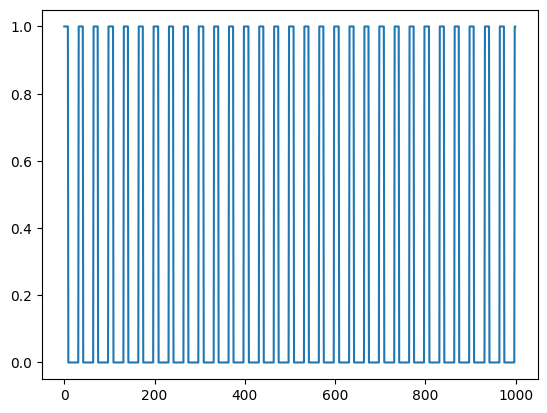

In [11]:
start = 300
secs = 1
ms = 1000
plt.plot(ttl_full[start*ms:(start+secs)*ms])
